In [ ]:
!pip install split-folders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders 
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/MyDrive/PlantVillage/data", output="Dataset",seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) 

Copying files: 20639 files [05:50, 58.90 files/s] 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
DATA_PATH = '/content/drive/MyDrive/PlantVillage/data'
IMG_SHAPE = (224, 224)
INPUT_SHAPE = [224, 224, 3]
EPOCHS = 20
BS = 32
img_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True,
                                 shear_range=0.2, validation_split=0.25)

train_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BS, subset='training', 
                                                  class_mode="sparse" , shuffle=True) 

val_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BS, subset='validation', 
                                                  class_mode="sparse" , shuffle=True)
label = train_data_gen.class_indices

Found 15482 images belonging to 15 classes.
Found 5156 images belonging to 15 classes.


In [ ]:
def model_building(model_name, INPUT_SHAPE=INPUT_SHAPE):
    print('Model Initialization started')
    base_model = model_name(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
    
    for layers in base_model.layers:
        layers.trainable = False
    print('Model Initialization finished')
    
    #model creation
    print('Model creation started')
    inp_model = base_model.output
    
    x = GlobalAveragePooling2D()(inp_model)
    x = Dense(128, activation = 'relu')(x)
    x = Dense(15, activation = 'sigmoid')(x)
    
    model = Model(inputs = base_model.input, outputs = x)
    
    #model summary
    print('Model summary')
    #model.summary()
    
    #model compilation
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )
    history = model.fit(
        train_data_gen,
        steps_per_epoch=47,
        batch_size=32,
        validation_data=val_data_gen,
        validation_steps=6,
        verbose=1,
        #epochs=20,
        epochs=10,
    )
    
    print('Model Building Finished')
    !mkdir -p saved_model
    model.save(f'saved_model/{model_name}_1.h5')
    print('Model was saved') 

    return history

In [ ]:
def evaluation_plot(model):
    sns.set_style('whitegrid')
    
    plt.figure(figsize=(10, 8))
    plt.plot(model['loss'], label = 'loss')
    plt.plot(model['accuracy'], label = 'accuracy')
    plt.plot(model['val_loss'], label = 'val_loss')
    plt.plot(model['val_accuracy'], label = 'val_accuracy')
    plt.legend()
    plt.title('Model Evaluation')
    plt.show()

#InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
inc_history = model_building(InceptionV3) 

Model Initialization started
87910968/87910968 [==============================] - 1s 0us/step
Model Initialization finished
Model creation started
Model summary
Epoch 1/10
47/47 [==============================] - 276s 6s/step - loss: 1.8225 - accuracy: 0.4328 - val_loss: 1.3822 - val_accuracy: 0.5729
Epoch 2/10
47/47 [==============================] - 269s 6s/step - loss: 1.1995 - accuracy: 0.6170 - val_loss: 1.1177 - val_accuracy: 0.6354
Epoch 3/10
47/47 [==============================] - 270s 6s/step - loss: 0.9491 - accuracy: 0.7048 - val_loss: 1.1480 - val_accuracy: 0.5990
Epoch 4/10
47/47 [==============================] - 273s 6s/step - loss: 0.8790 - accuracy: 0.7101 - val_loss: 0.8903 - val_accuracy: 0.6927
Epoch 5/10
47/47 [==============================] - 270s 6s/step - loss: 0.8101 - accuracy: 0.7394 - val_loss: 0.9156 - val_accuracy: 0.6719
Epoch 6/10
47/47 [==============================] - 272s 6s/step - loss: 0.7363 - accuracy: 0.7507 - val_loss: 0.9561 - val_accuracy: 

In [ ]:
evaluation_plot(inc_history.history)

#Potato only

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
DATA_PATH = '/content/drive/MyDrive/potato-disease'
IMG_SHAPE = (224, 224)
INPUT_SHAPE = [224, 224, 3]
EPOCHS = 10
BS = 32
img_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True,
                                 shear_range=0.2, validation_split=0.25)

train_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BS, subset='training', 
                                                  class_mode="sparse" , shuffle=True) 

val_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BS, subset='validation', 
                                                  class_mode="sparse" , shuffle=True)
label = train_data_gen.class_indices

Found 1621 images belonging to 3 classes.
Found 540 images belonging to 3 classes.


In [ ]:
def model_building(model_name, INPUT_SHAPE=INPUT_SHAPE):
    print('Model Initialization started')
    base_model = model_name(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
    
    for layers in base_model.layers:
        layers.trainable = False
    print('Model Initialization finished')
    
    #model creation
    print('Model creation started')
    inp_model = base_model.output
    
    x = GlobalAveragePooling2D()(inp_model)
    x = Dense(128, activation = 'relu')(x)
    x = Dense(15, activation = 'sigmoid')(x)
    
    model = Model(inputs = base_model.input, outputs = x)
    
    #model summary
    print('Model summary')
    #model.summary()
    
    #model compilation
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )
    history = model.fit(
        train_data_gen,
        steps_per_epoch=47,
        batch_size=32,
        validation_data=val_data_gen,
        validation_steps=6,
        verbose=1,
        #epochs=20,
        epochs=10,
    )
    
    print('Model Building Finished')
    !mkdir -p saved_model
    model.save(f'saved_model/{model_name}_1.h5')
    print('Model was saved') 

    return history

In [ ]:
def evaluation_plot(model):
    sns.set_style('whitegrid')
    
    plt.figure(figsize=(10, 8))
    plt.plot(model['loss'], label = 'loss')
    plt.plot(model['accuracy'], label = 'accuracy')
    plt.plot(model['val_loss'], label = 'val_loss')
    plt.plot(model['val_accuracy'], label = 'val_accuracy')
    plt.legend()
    plt.title('Model Evaluation')
    plt.show()

##Inception V3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
inc_history = model_building(InceptionV3) 

Model Initialization started
Model Initialization finished
Model creation started
Model summary
Epoch 1/20
47/47 [==============================] - 201s 4s/step - loss: 0.5030 - accuracy: 0.8024 - val_loss: 0.3415 - val_accuracy: 0.8750
Epoch 2/20
47/47 [==============================] - 179s 4s/step - loss: 0.2123 - accuracy: 0.9324 - val_loss: 0.1891 - val_accuracy: 0.9323
Epoch 3/20
47/47 [==============================] - 175s 4s/step - loss: 0.1981 - accuracy: 0.9243 - val_loss: 0.2179 - val_accuracy: 0.9375
Epoch 4/20
47/47 [==============================] - 177s 4s/step - loss: 0.1948 - accuracy: 0.9250 - val_loss: 0.1341 - val_accuracy: 0.9635
Epoch 5/20
47/47 [==============================] - 177s 4s/step - loss: 0.1338 - accuracy: 0.9524 - val_loss: 0.0995 - val_accuracy: 0.9635
Epoch 6/20
47/47 [==============================] - 178s 4s/step - loss: 0.1276 - accuracy: 0.9565 - val_loss: 0.1811 - val_accuracy: 0.9167
Epoch 7/20
47/47 [==============================] - 178s 4

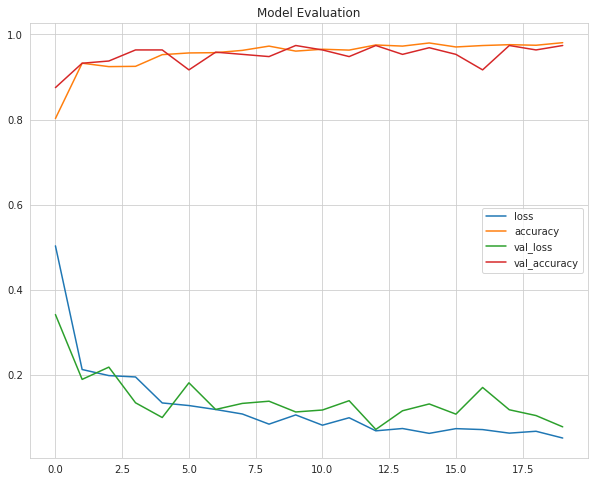

In [ ]:
evaluation_plot(inc_history.history)

##VGG-16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_hist = model_building(VGG16)

Model Initialization started
58889256/58889256 [==============================] - 1s 0us/step
Model Initialization finished
Model creation started
Model summary
Epoch 1/20
47/47 [==============================] - 832s 18s/step - loss: 1.0637 - accuracy: 0.6852 - val_loss: 0.5851 - val_accuracy: 0.8698
Epoch 2/20
47/47 [==============================] - 812s 17s/step - loss: 0.5495 - accuracy: 0.8473 - val_loss: 0.4388 - val_accuracy: 0.8854
Epoch 3/20
47/47 [==============================] - 803s 17s/step - loss: 0.4310 - accuracy: 0.8721 - val_loss: 0.3937 - val_accuracy: 0.8854
Epoch 4/20
47/47 [==============================] - 827s 18s/step - loss: 0.3684 - accuracy: 0.8821 - val_loss: 0.3225 - val_accuracy: 0.8802
Epoch 5/20
47/47 [==============================] - 812s 17s/step - loss: 0.3097 - accuracy: 0.8942 - val_loss: 0.2368 - val_accuracy: 0.9062
Epoch 6/20
47/47 [==============================] - 827s 18s/step - loss: 0.2731 - accuracy: 0.8982 - val_loss: 0.2401 - val_accu

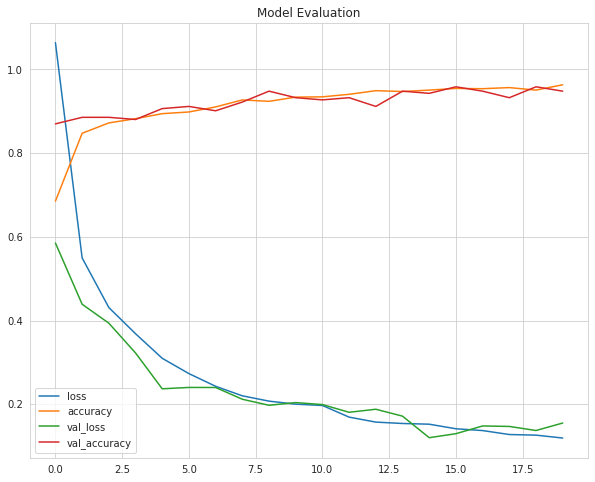

In [ ]:
evaluation_plot(vgg16_hist.history)

##VGG-19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19_hist = model_building(VGG19) 

Model Initialization started
Model Initialization finished
Model creation started
Model summary
Epoch 1/10
47/47 [==============================] - 998s 21s/step - loss: 0.9583 - accuracy: 0.6222 - val_loss: 0.6118 - val_accuracy: 0.8229
Epoch 2/10
47/47 [==============================] - 985s 21s/step - loss: 0.5790 - accuracy: 0.8131 - val_loss: 0.5242 - val_accuracy: 0.7969
Epoch 3/10
47/47 [==============================] - 987s 21s/step - loss: 0.4602 - accuracy: 0.8617 - val_loss: 0.4003 - val_accuracy: 0.8958
Epoch 4/10
47/47 [==============================] - 981s 21s/step - loss: 0.3854 - accuracy: 0.8855 - val_loss: 0.3463 - val_accuracy: 0.8958
Epoch 5/10
47/47 [==============================] - 978s 21s/step - loss: 0.3272 - accuracy: 0.9002 - val_loss: 0.3234 - val_accuracy: 0.8750
Epoch 6/10
47/47 [==============================] - 981s 21s/step - loss: 0.2956 - accuracy: 0.9029 - val_loss: 0.2632 - val_accuracy: 0.9167
Epoch 7/10
47/47 [==============================] - 

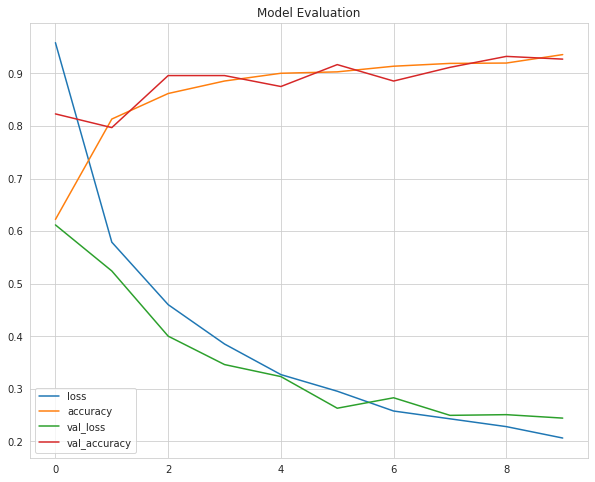

In [ ]:
evaluation_plot(vgg19_hist.history)

##Plots

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
print(os.listdir('/content/drive/MyDrive/PlantVillage'))

['data']


In [ ]:

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

##MobileNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop
# model.compile(loss='binary_crossentropy',
#               optimizer=RMSprop(lr=0.001),
#               metrics=['accuracy', tf.keras.metrics.AUC()])
from tensorflow.keras import optimizers
model.compile(optimizer=RMSprop(learning_rate=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')
import time
st=time.perf_counter()
history = model.fit(
      train_data_gen,
      steps_per_epoch=8,  
      epochs=20,
      verbose=1,
      validation_data = val_data_gen,
      validation_steps=8)
nd=time.perf_counter()

Epoch 1/20
8/8 [==============================] - 252s 33s/step - loss: 1.1372 - accuracy: 0.6328 - val_loss: 0.1245 - val_accuracy: 0.6562
Epoch 2/20
8/8 [==============================] - 168s 22s/step - loss: 0.1837 - accuracy: 0.7695 - val_loss: -0.2415 - val_accuracy: 0.8711
Epoch 3/20
8/8 [==============================] - 111s 14s/step - loss: -0.4028 - accuracy: 0.8281 - val_loss: -0.1748 - val_accuracy: 0.7188
Epoch 4/20
8/8 [==============================] - 89s 11s/step - loss: -0.7880 - accuracy: 0.7930 - val_loss: -0.4610 - val_accuracy: 0.6797
Epoch 5/20
8/8 [==============================] - 64s 8s/step - loss: -0.4309 - accuracy: 0.8125 - val_loss: -0.9406 - val_accuracy: 0.8984
Epoch 6/20
8/8 [==============================] - 59s 8s/step - loss: -0.9985 - accuracy: 0.8125 - val_loss: -1.0721 - val_accuracy: 0.8789
Epoch 7/20
8/8 [==============================] - 49s 6s/step - loss: -1.1345 - accuracy: 0.8516 - val_loss: -1.8088 - val_accuracy: 0.8789
Epoch 8/20
8/8 [

In [ ]:
print("train_time: ",nd-st);

train_time:  1491.661049285


In [ ]:
model.evaluate(val_data_gen)

17/17 [==============================] - 22s 1s/step - loss: -4.6155 - accuracy: 0.8759


[-4.615456581115723, 0.8759258985519409]

In [ ]:
model.save('mnet.h5')

In [ ]:
STEP_SIZE_TEST=val_data_gen.n//val_data_gen.batch_size
val_data_gen.reset()
preds = model.predict(val_data_gen,
                      verbose=1)

17/17 [==============================] - 27s 1s/step


In [ ]:
fpr, tpr, thresholds = roc_curve(val_data_gen.classes, preds, pos_label=1)

In [ ]:
roc_auc = auc(fpr, tpr)

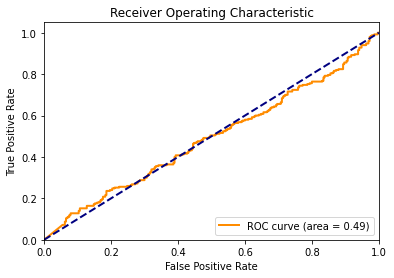

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##SqueezeNet

In [ ]:
bnmomemtum=0.9
def fire(x, squeeze, expand):
    y  = tf.keras.layers.Conv2D(filters=squeeze, kernel_size=1, activation='relu', padding='same')(x)
    y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
    y1 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=1, activation='relu', padding='same')(y)
    y1 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y1)
    y3 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=3, activation='relu', padding='same')(y)
    y3 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y3)
    return tf.keras.layers.concatenate([y1, y3])

def fire_module(squeeze, expand):
    return lambda x: fire(x, squeeze, expand)
x = tf.keras.layers.Input(shape=[200,200, 3]) # input is 200x200 pixels RGB
y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=True, activation='relu')(x)
y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
y = fire_module(24, 48)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(48, 96)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(64, 128)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(48, 96)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 48)(y)
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(1, activation='sigmoid')(y)

model2 = tf.keras.Model(x, y)

model2.compile(
optimizer='adam',
loss= 'binary_crossentropy',
metrics=['accuracy'])
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 200, 200, 32  896         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_16 (BatchN  (None, 200, 200, 32  128        ['conv2d_16[0][0]']              
 ormalization)                  )                                                           

In [ ]:
st=time.perf_counter()
history = model2.fit(
      train_data_gen,
      steps_per_epoch=8,  
      epochs=20,
      verbose=1,
      validation_data = val_data_gen,
      validation_steps=8)
nd=time.perf_counter()

Epoch 1/20
8/8 [==============================] - 113s 14s/step - loss: 0.1359 - accuracy: 0.8359 - val_loss: 0.6626 - val_accuracy: 0.4727
Epoch 2/20
8/8 [==============================] - 107s 14s/step - loss: -0.1690 - accuracy: 0.9023 - val_loss: 0.7842 - val_accuracy: 0.4570
Epoch 3/20
8/8 [==============================] - 104s 13s/step - loss: -0.3770 - accuracy: 0.9062 - val_loss: 0.9626 - val_accuracy: 0.4805
Epoch 4/20
8/8 [==============================] - 106s 13s/step - loss: -0.7033 - accuracy: 0.8984 - val_loss: 0.9582 - val_accuracy: 0.4688
Epoch 5/20
8/8 [==============================] - 103s 13s/step - loss: -0.9015 - accuracy: 0.8694 - val_loss: 0.6071 - val_accuracy: 0.4609
Epoch 6/20
8/8 [==============================] - 107s 14s/step - loss: -0.8226 - accuracy: 0.8984 - val_loss: 0.1325 - val_accuracy: 0.8789
Epoch 7/20
8/8 [==============================] - 109s 14s/step - loss: -1.1650 - accuracy: 0.8828 - val_loss: 0.2896 - val_accuracy: 0.7305
Epoch 8/20
8/8

In [ ]:
print("train time-squeezenet: ", nd-st)

train time-squeezenet:  2600.487313584


In [ ]:
model2.evaluate(val_data_gen)

17/17 [==============================] - 43s 3s/step - loss: -1.6788 - accuracy: 0.7648


[-1.678795576095581, 0.7648147940635681]

In [ ]:
model2.save('sqnet.h5')

In [ ]:
STEP_SIZE_TEST=val_data_gen.n//val_data_gen.batch_size
val_data_gen.reset()
preds = model2.predict(val_data_gen,
                      verbose=1)

17/17 [==============================] - 46s 3s/step


In [ ]:
fpr2, tpr2, _ = roc_curve(val_data_gen.classes, preds, pos_label=1)

In [ ]:
roc_auc2 = auc(fpr, tpr)

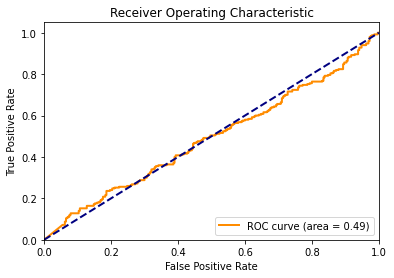

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##----------------------------------------------------------------------------------------------------------------------------------------------------

##COMPLETED

##----------------------------------------------------------------------------------------------------------------------------------------------------

##LeNet

In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

##VGG16

https://docs.python.org/3/library/argparse.html

In [ ]:
# import matplotlib to save plot
import matplotlib
matplotlib.use("Agg")

# import all libraries and packages
from finalproject.vgg16 import VGG16
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import random
import pickle
import cv2
import os

# parser argument
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
	help="path to input dataset of images")
ap.add_argument("-m", "--model", required=True,
	help="path to output trained model")
ap.add_argument("-l", "--label-bin", required=True,
	help="path to output label binarizer")
ap.add_argument("-p", "--plot", required=True,
	help="path to output accuracy/loss plot")
args = vars(ap.parse_args())

# initialize data and and label
print("[INFO] loading images...")
data = []
labels = []

# randomly shuffle input dataset to make image path
imagePaths = sorted(list(paths.list_images(args["dataset"])))
random.seed(42)
random.shuffle(imagePaths)

# loop input picture
for imagePath in imagePaths:
	# load image path, then resize to 64x64 (VGG)
	#collect data list
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (64, 64))
	data.append(image)

	# extract class label from image path and update
	# label list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

# scale raw pixel intensity to range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# dataset partition for automated training and testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

# convert label from integer to vector
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# hard data augmentation(automatic)
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

# initialize model
model = VGG16.build(width=64, height=64, depth=3,
	classes=len(lb.classes_))

# epoch initialization, learning rate and batch size
INIT_LR = 0.01
EPOCHS = 20
BS = 32

# model initialization and optimizer
print("[INFO] training network...")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# training 
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS)

# validation
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))
print(confusion_matrix(testY.argmax(axis=1),
	predictions.argmax(axis=1)))

# plot training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(1)

# accuracy
plt.subplot(211) 
plt.plot(N, H.history["accuracy"], label="train_accuracy")
plt.plot(N, H.history["val_accuracy"], label="val_accuracy")
plt.title('model accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  

#loss
plt.subplot(212)
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title('model loss')  
plt.ylabel('Loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')

#save plot
plt.tight_layout() 
plt.savefig(args["plot"])


# save model and label
print("[INFO] serializing network and label binarizer...")
model.save(args["model"])
f = open(args["label_bin"], "wb")
f.write(pickle.dumps(lb))
f.close()

In [ ]:
# import library and packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

class VGG16:
	@staticmethod
	def build(width, height, depth, classes):
		#inisialisasi model
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		#BLOCK 1
		# CONV => RELU => POOL layer set
		model.add(Conv2D(64, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(Conv2D(64, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		#BLOCK 2
		# (CONV => RELU) * 2 => POOL layer set
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		#BLOCK 3
		# (CONV => RELU) * 3 => POOL layer set
		model.add(Conv2D(256, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(256, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(256, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		#BLOCK 4
		# (CONV => RELU) * 3 => POOL layer set
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		#BLOCK 5
		# (CONV => RELU) * 3 => POOL layer set
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# FC => RELU layers
		model.add(Flatten())
		model.add(Dense(4096))
		model.add(Activation("relu"))
		model.add(Dense(4096))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return model
		return 

##VGG19

In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

class VGG19:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		#BLOCK 1
		# CONV => RELU => POOL layer set
		model.add(Conv2D(64, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(Conv2D(64, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		#BLOCK 2
		# (CONV => RELU) * 2 => POOL layer set
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		#BLOCK 3
		# (CONV => RELU) * 3 => POOL layer set
		model.add(Conv2D(256, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(256, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(256, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(256, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		#BLOCK 4
		# (CONV => RELU) * 3 => POOL layer set
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		#BLOCK 5
		# (CONV => RELU) * 3 => POOL layer set
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(Conv2D(512, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(4096))
		model.add(Activation("relu"))
		model.add(Dense(4096))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

## CODE

In [ ]:
# python classify.py --image images/alter.jpg --model output/finalprojectb1.model --label-bin output/finalprojectb1.pickle --width 64 --height 64

# import library dan packages
from keras.models import load_model
import argparse
import pickle
import cv2

# argumen parser
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image we are going to classify")
ap.add_argument("-m", "--model", required=True,
	help="path to trained Keras model")
ap.add_argument("-l", "--label-bin", required=True,
	help="path to label binarizer")
ap.add_argument("-w", "--width", type=int, default=28,
	help="target spatial dimension width")
ap.add_argument("-e", "--height", type=int, default=28,
	help="target spatial dimension height")
ap.add_argument("-f", "--flatten", type=int, default=-1,
	help="whether or not we should flatten the image")
args = vars(ap.parse_args())

# load gambar dan resize
image = cv2.imread(args["image"])
output = image.copy()
image = cv2.resize(image, (args["width"], args["height"]))

# scale pixel values to [0, 1]
image = image.astype("float") / 255.0

# flatten cek
if args["flatten"] > 0:
	image = image.flatten()
	image = image.reshape((1, image.shape[0]))

else:
	image = image.reshape((1, image.shape[0], image.shape[1],
		image.shape[2]))

# load model dan label
print("[INFO] loading network and label binarizer...")
model = load_model(args["model"])
lb = pickle.loads(open(args["label_bin"], "rb").read())

# prediksi
preds = model.predict(image)
print(preds)

# menentukan class label untuk gambar
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

# munculin hasil klasifikasi + prosentase
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (5, 50), cv2.FONT_HERSHEY_TRIPLEX, 0.7,
	(0, 0, 255), 2)


# munculin gambar
cv2.imshow("Potato Leaf Disease Classification Based on Deep Learning", output)
cv2.waitKey(0)